<a href="https://colab.research.google.com/github/hasbanny/Deep-Learning-based-Quality-Control-Automation-Application-in-Smart-Factories/blob/main/Deep_Learning_Based_Quality_Control_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 12 2021

@author: catalina - subba - hasbanny 
"""
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import os
import gdown
from pathlib import Path
from tensorflow import keras

In [ ]:
os.makedirs("quality-control")

In [ ]:
with ZipFile("/content/drive/MyDrive/Quality-Control/quality-control-data-v1.zip", "r") as zipobj:
    zipobj.extractall("quality-control")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/quality-control'

 ## Data Augmentation 

 Already augmented data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
import glob, os

from time import sleep
from progress.bar import Bar

datagen = ImageDataGenerator(
        rotation_range = 40,
        horizontal_flip = True)

os.chdir("/content/drive/MyDrive/Machine learning/Quality-Control/quality-control-data-v1/Good Parts/")
for file in glob.glob("*.jpg"):
  img = load_img(file) 
  # Converting the input sample image to an array
  x = img_to_array(img)
  x = x.reshape((1, ) + x.shape) 

  i = 0


  for batch in datagen.flow(x, batch_size = 1,
                            save_to_dir ='/content/drive/MyDrive/Machine learning/Quality-Control/augmented-data/good', 
                            save_prefix ='image', save_format ='jpg'):
      i += 1
      if i > 30:
          break

# Training Dataset

In [ ]:
image_size = (256, 256)
batch_size = 64


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Quality-Control/quality-control-data-v1",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Quality-Control/quality-control-data-v1",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

class_names = train_ds.class_names
print(class_names)

Found 246 files belonging to 2 classes.
Using 197 files for training.
Found 246 files belonging to 2 classes.
Using 49 files for validation.
['Bad Parts', 'Good Parts']


Epoch 1/120
4/4 [==============================] - 65s 3s/step - loss: 0.5202 - accuracy: 0.9289 - val_loss: 0.4887 - val_accuracy: 0.8571
Epoch 2/120
4/4 [==============================] - 1s 255ms/step - loss: 0.2669 - accuracy: 0.9289 - val_loss: 0.6150 - val_accuracy: 0.8571
Epoch 3/120
4/4 [==============================] - 1s 255ms/step - loss: 0.4269 - accuracy: 0.9289 - val_loss: 0.6269 - val_accuracy: 0.8571
Epoch 4/120
4/4 [==============================] - 1s 255ms/step - loss: 0.4451 - accuracy: 0.9289 - val_loss: 0.5926 - val_accuracy: 0.8571
Epoch 5/120
4/4 [==============================] - 1s 255ms/step - loss: 0.3581 - accuracy: 0.9289 - val_loss: 0.5240 - val_accuracy: 0.8571
Epoch 6/120
4/4 [==============================] - 1s 253ms/step - loss: 0.2709 - accuracy: 0.9289 - val_loss: 0.4973 - val_accuracy: 0.8571
Epoch 7/120
4/4 [==============================] - 1s 253ms/step - loss: 0.2574 - accuracy: 0.9289 - val_loss: 0.5092 - val_accuracy: 0.8571
Epoch 8/120
4/4

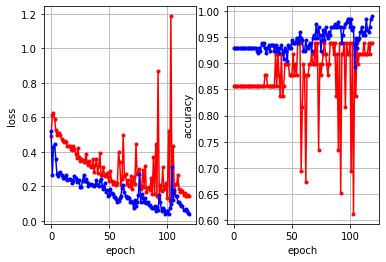

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
    ])

model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=120)
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

keras.utils.plot_model(model, show_shapes=True)
model.summary()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()

## Image Predicition

In [ ]:
 testimage_path = "/content/drive/MyDrive/Quality-Control/quality-control-data-v1/Good Parts/Image_20211005123258372.jpg"

img = tf.keras.utils.load_img(
    testimage_path, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Bad Parts with a 98.56 percent confidence.


Found 244 files belonging to 2 classes.
Using 196 files for training.
Found 244 files belonging to 2 classes.
Using 48 files for validation.
Epoch 1/100
4/4 [==============================] - 10s 1s/step - loss: 182.5078 - accuracy: 0.8520 - val_loss: 1.1172 - val_accuracy: 0.8542
Epoch 2/100
4/4 [==============================] - 1s 137ms/step - loss: 0.4133 - accuracy: 0.9388 - val_loss: 5.3728 - val_accuracy: 0.8542
Epoch 3/100
4/4 [==============================] - 1s 136ms/step - loss: 1.6959 - accuracy: 0.8061 - val_loss: 4.5480 - val_accuracy: 0.8542
Epoch 4/100
4/4 [==============================] - 1s 137ms/step - loss: 1.1425 - accuracy: 0.9388 - val_loss: 0.7393 - val_accuracy: 0.8542
Epoch 5/100
4/4 [==============================] - 1s 142ms/step - loss: 0.2882 - accuracy: 0.9388 - val_loss: 0.4316 - val_accuracy: 0.8542
Epoch 6/100
4/4 [==============================] - 1s 138ms/step - loss: 0.2062 - accuracy: 0.9388 - val_loss: 0.5324 - val_accuracy: 0.8542
Epoch 7/100
4

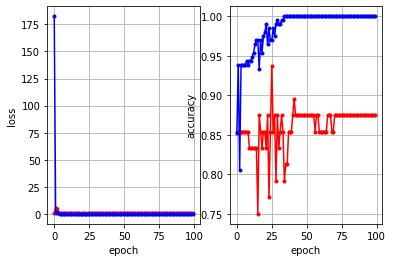

In [ ]:
from tensorflow.keras import layers
import pathlib
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
import numpy as np

data_dir = "/content/drive/MyDrive/Quality-Control/quality-control-data-v1"
data_dir = pathlib.Path(data_dir)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=64)
#
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=64)

class_names = train_ds.class_names

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

def alexnet(in_shape=(256,256,3), n_classes=2):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
    pool1 = layers.MaxPool2D(3, 2)(conv1)
    conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D(3, 2)(conv2)
    conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
    conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPool2D(3, 2)(conv4)
    flattened = layers.Flatten()(pool3)
    dense1 = layers.Dense(4096, activation='relu')(flattened)
    drop1 = layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(4096, activation='relu')(drop1)
    drop2 = layers.Dropout(0.5)(dense2)
    preds = layers.Dense(n_classes, activation='softmax')(drop2)
    model = Model(in_layer, preds)
    return model

model = alexnet()
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(train_ds, epochs=100, validation_data=val_ds)

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()

#model.evaluate(test_x, test_y)

Found 244 files belonging to 2 classes.
Using 196 files for training.
Found 244 files belonging to 2 classes.
Using 48 files for validation.
Epoch 1/50
4/4 [==============================] - 33s 9s/step - loss: 116.6122 - accuracy: 0.6735 - val_loss: 0.6539 - val_accuracy: 0.8542
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 0.6160 - accuracy: 0.9388 - val_loss: 0.5113 - val_accuracy: 0.8542
Epoch 3/50
4/4 [==============================] - 7s 2s/step - loss: 0.2818 - accuracy: 0.9388 - val_loss: 0.6267 - val_accuracy: 0.8542
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 0.2754 - accuracy: 0.9388 - val_loss: 0.4883 - val_accuracy: 0.8542
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 0.2303 - accuracy: 0.9388 - val_loss: 0.6015 - val_accuracy: 0.8542
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.2544 - accuracy: 0.9388 - val_loss: 0.4373 - val_accuracy: 0.8542
Epoch 7/50
4/4 [==================

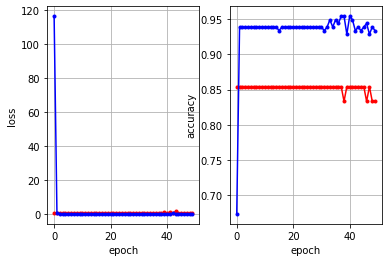

In [ ]:
from functools import partial
from tensorflow.keras import layers
import pathlib
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
import numpy as np

data_dir = "/content/drive/MyDrive/Quality-Control/quality-control-data-v1"
data_dir = pathlib.Path(data_dir)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(256, 256), batch_size=64)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(256, 256), batch_size=64)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

conv3 = partial(layers.Conv2D, kernel_size=3, strides=1, padding='same', activation='relu')

def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block

def _vgg(in_shape=(256, 256, 3), n_classes=2, n_stages_per_blocks=[2, 2, 3, 3, 3]):
    in_layer = layers.Input(in_shape)
    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense2 = layers.Dense(4096, activation='relu')(dense1)
    preds = layers.Dense(n_classes, activation='softmax')(dense2)

    model = Model(in_layer, preds)
    return model

def vgg16(in_shape=(256,256,3), n_classes=2):
    return _vgg(in_shape, n_classes)

def vgg19(in_shape=(256,256,3), n_classes=2):
    return _vgg(in_shape, n_classes, [2, 2, 4, 4, 4])

model = vgg16()
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()
#model.evaluate(test_x, test_y)